### data3数据

In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [71]:
dataset = pd.read_csv('data/data3.csv',engine='python')

In [72]:
dataset

,35KV 4# 主变用电量,data
0,161390048,NaN
1,161390448,400.0
2,161390880,432.0
3,161391296,416.0
4,161391712,416.0
...,...,...
145,161458080,416.0
146,161458496,416.0
147,161458928,432.0
148,161459344,416.0


In [73]:
dataset = dataset.fillna(0)
dataset

,35KV 4# 主变用电量,data
0,161390048,0.0
1,161390448,400.0
2,161390880,432.0
3,161391296,416.0
4,161391712,416.0
...,...,...
145,161458080,416.0
146,161458496,416.0
147,161458928,432.0
148,161459344,416.0


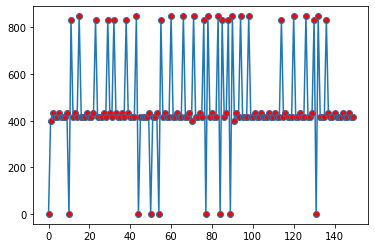

In [74]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [75]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.09
test_data = []
anomaly = []

In [76]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [77]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [78]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [79]:
ifm.fit(x)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 4 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 6 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...
Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 8 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this para

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7FB5BFCEBD40, verbose=2)

In [80]:
scores_pred = ifm.decision_function(x)

In [81]:
scores_pred

array([-0.17844726, -0.20393226,  0.01472425,  0.09569103,  0.09569103,
        0.01472425,  0.09569103,  0.09569103,  0.09569103,  0.01472425,
       -0.17844726, -0.10524677,  0.09569103,  0.01472425,  0.09569103,
       -0.10154544,  0.09569103,  0.09569103,  0.09569103,  0.01472425,
        0.09569103,  0.09569103,  0.01472425, -0.10524677,  0.09569103,
        0.09569103,  0.09569103,  0.01472425,  0.09569103, -0.10524677,
        0.01472425,  0.09569103, -0.10524677,  0.01472425,  0.09569103,
        0.09569103,  0.01472425,  0.09569103, -0.10524677,  0.01472425,
        0.09569103,  0.09569103,  0.09569103, -0.10154544, -0.17844726,
        0.09569103,  0.09569103,  0.09569103,  0.09569103,  0.01472425,
       -0.17844726,  0.09569103,  0.09569103,  0.01472425, -0.17844726,
       -0.10524677,  0.09569103,  0.01472425,  0.09569103,  0.09569103,
       -0.10154544,  0.09569103,  0.09569103,  0.01472425,  0.09569103,
        0.09569103, -0.10154544,  0.09569103,  0.09569103,  0.01

In [82]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [83]:
threshold

-0.10524676898908503

In [84]:
dataset

,35KV 4# 主变用电量,data
0,161390048,0.0
1,161390448,400.0
2,161390880,432.0
3,161391296,416.0
4,161391712,416.0
...,...,...
145,161458080,416.0
146,161458496,416.0
147,161458928,432.0
148,161459344,416.0


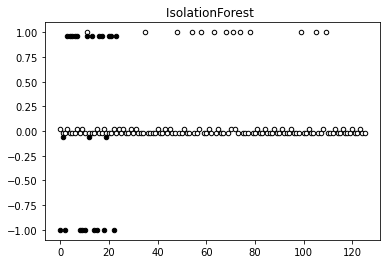

In [85]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['35KV 4# 主变用电量'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['35KV 4# 主变用电量','data','x', 'IsoFst_Score','label'])
b = plt.scatter(list(range(0,126)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,24)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [86]:
ano_lable = np.column_stack(((df['35KV 4# 主变用电量'],df['data'],x,scores_pred, test_data)))

In [87]:
ano_lable

array([[ 1.61390048e+08,  0.00000000e+00, -1.00000000e+00,
        -1.78447263e-01,  1.00000000e+00],
       [ 1.61390448e+08,  4.00000000e+02, -5.66037736e-02,
        -2.03932259e-01,  1.00000000e+00],
       [ 1.61390880e+08,  4.32000000e+02,  1.88679245e-02,
         1.47242529e-02,  0.00000000e+00],
       [ 1.61391296e+08,  4.16000000e+02, -1.88679245e-02,
         9.56910298e-02,  0.00000000e+00],
       [ 1.61391712e+08,  4.16000000e+02, -1.88679245e-02,
         9.56910298e-02,  0.00000000e+00],
       [ 1.61392144e+08,  4.32000000e+02,  1.88679245e-02,
         1.47242529e-02,  0.00000000e+00],
       [ 1.61392560e+08,  4.16000000e+02, -1.88679245e-02,
         9.56910298e-02,  0.00000000e+00],
       [ 1.61392976e+08,  4.16000000e+02, -1.88679245e-02,
         9.56910298e-02,  0.00000000e+00],
       [ 1.61393392e+08,  4.16000000e+02, -1.88679245e-02,
         9.56910298e-02,  0.00000000e+00],
       [ 1.61393824e+08,  4.32000000e+02,  1.88679245e-02,
         1.47242529e-02

In [88]:
df = pd.DataFrame(data=ano_lable, columns=['35KV 4# 主变用电量','data','x', 'IsoFst_Score','label'])

In [89]:
df

,35KV 4# 主变用电量,data,x,IsoFst_Score,label
0,161390048.0,0.0,-1.000000,-0.178447,1.0
1,161390448.0,400.0,-0.056604,-0.203932,1.0
2,161390880.0,432.0,0.018868,0.014724,0.0
3,161391296.0,416.0,-0.018868,0.095691,0.0
4,161391712.0,416.0,-0.018868,0.095691,0.0
...,...,...,...,...,...
145,161458080.0,416.0,-0.018868,0.095691,0.0
146,161458496.0,416.0,-0.018868,0.095691,0.0
147,161458928.0,432.0,0.018868,0.014724,0.0
148,161459344.0,416.0,-0.018868,0.095691,0.0


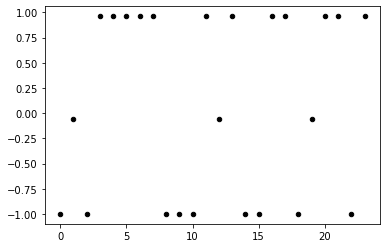

In [91]:
c = plt.scatter(list(range(0,24)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [92]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.10524676898908503
全量数据样本数： 150 个
检测异常样本数： 24 个
